# Всякое про отронормированный полином Лежардра

Ипортируем sympy и подключаем математический шрифт для нормально вывода результатов 

In [1]:
import sympy
sympy.init_printing()

Задаём переменную для символьных вычислений

In [2]:
x = sympy.Symbol('x')

задаём функцию

In [3]:
f = (x**3-3*x+1)

In [4]:
f = sympy.sin(2*x)

In [5]:
f = sympy.sign(sympy.sin(2*x))

In [6]:
f

задаём матрицу полиномов
`sympy.Rational` - это дробь, чтобы не вычислялось приближенно
`sympy.sqrt` - корень, тоже чтобы не вычислялось приближенно

In [7]:
P1=sympy.Matrix([0,0,0,0])
P1[0]=1/sympy.sqrt(2)
P1[1]=x*sympy.sqrt(sympy.Rational(3/2))
P1[2]=sympy.sqrt(sympy.Rational(45,8))*(x**2-sympy.Rational(1,3))
P1[3]=(5*x**3-3*x)/2*sympy.sqrt(sympy.Rational(7/2))

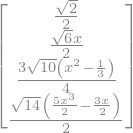

In [8]:
P1

Или берём не готовые коэффициенты, а вычисляем их

Задаем формулу для определения полиномов лежандра (формула Родрига)

$$ P_n(x) = \frac {1}{2^nn!} \frac{d^n}{dx^n} (x^2-1)^n $$

In [9]:
def fR(n):
    return 1/(2**n*sympy.factorial(n))*sympy.diff((x**2-1)**n, x, n)

Функции получения нормы и нормализации функции

In [10]:
def get_norm(fs):
    return sympy.sqrt((fs*fs).integrate((x,-1,1)))

def normalize(fs):
    return fs/get_norm(fs)

Вычисляем первые `max_N` полиномов Лежандра

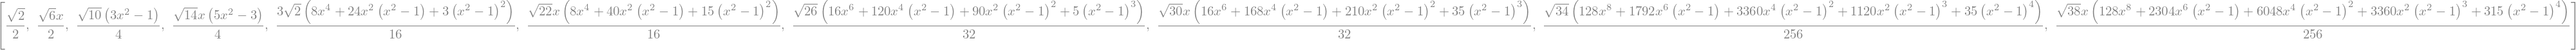

In [11]:
max_N = 10
P = []
for i in range(max_N):
    P.append(normalize(fR(i)))
P

находим коэффициенты расложения функции в обобщённый ряд Фурье


In [12]:
a=[]

In [13]:
for i in range(max_N):
    a.append( (f*P[i]).integrate((x,-1,1)))

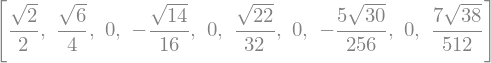

In [14]:
a

проверяем результат вычисления коэффициентов
$\sum_{n=0}^{max\_N-1} a_n P_n$


In [15]:
test_results = 0
for i in range(max_N):
    test_results += a[i]*P[i]

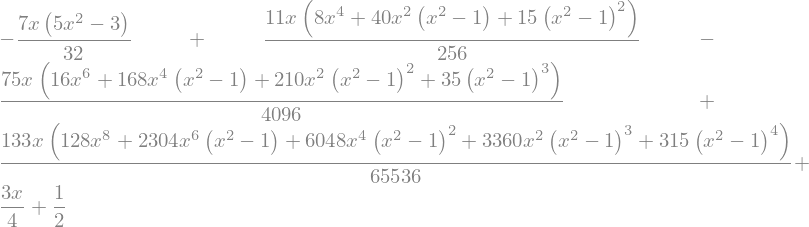

In [16]:
test_results

In [17]:
from sympy.plotting import plot

In [18]:
Pa = []
for i in range(max_N):
    Pa.append( a[i]*P[i])

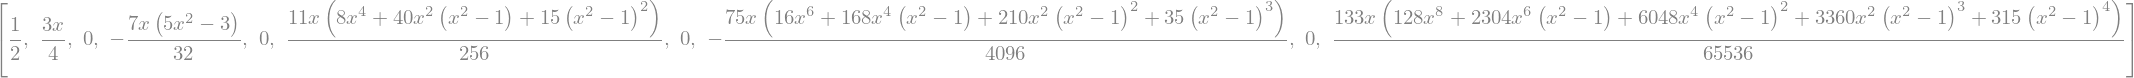

In [19]:
Pa

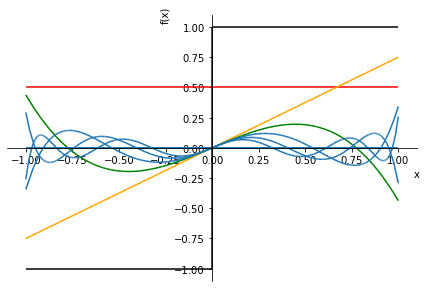

In [20]:

p = plot(*[e for e in Pa], f,(x,-1,1), show=False)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'puple', 'black']
colors.extend(['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'puple', 'black'])
for i in range(4):
    p[i].line_color = colors[i]
p[max_N].line_color='black'
p.show()

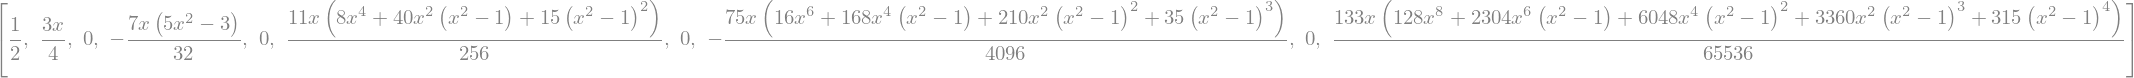

In [21]:
[e for e in Pa]

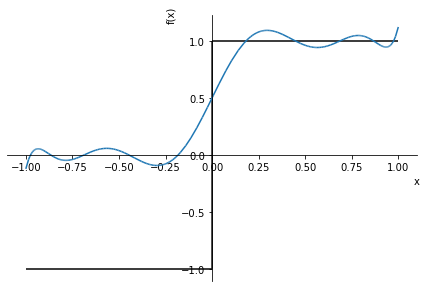

In [22]:
p2=plot(f, test_results,(x,-1,1), show=False)
p2[0].line_color='black'
p2.show()